In [1]:
# If you want the figures to appear in the notebook, 
# and you want to interact with them, use
# %matplotlib notebook

# If you want the figures to appear in the notebook, 
# and you don't want to interact with them, use
# %matplotlib inline

# If you want the figures to appear in separate windows, use
# %matplotlib qt5

# tempo switch from one to another, you have to select Kernel->Restart

%matplotlib inline

from modsim import *

In [2]:
m = UNITS.meter
s = UNITS.second
kg = UNITS.kilogram

In [3]:
def make_system(duration, v_init=0):
    """Make a system object.
    
    duration: time of simulation in seconds
    v_init: initial velocity, dimensionless
    
    returns: System object
    """
    init = State(y=381 * m, v=v_init * m / s)

    g = 9.8 * m/s**2
    ts = linspace(0, duration, 11)
    return System(init=init, g=g, ts=ts)

In [4]:
def final_velocity(system, results):
    """Returns the final velocity, with units.
    
    results: TimeFrame with v.
    
    returns: v at t_end
    """
    final = flight_time(system)
    t_end = final
    #print("Results.v:")
    #print(results.v)
    #print("\nt_end: {}".format(t_end))
    t = results.v.index[-1]
    v = results.v[t]
    #v = results.v.loc[t_end.magnitude]
    return v*m/s

In [5]:
def flight_time(system):
    """Simulates the system and computes flight time.
    
    Uses cubic interpolation.
    
    system: System object
    
    returns: flight time in seconds
    """
    condition.set(duration = 255*s)
    condition.set(start = 1000*m)
    condition.set(end = 0*m)
    system_human = make_system(condition)
    run_odeint(system_human, slope_func_update)
    y = system.results.y
    inverse = Series(y.index, index=y.values)
    T = interpolate(inverse, kind='cubic')
    T_sidewalk = T(0)
    return T_sidewalk * s

In [6]:
condition = Condition(height = 3700 * m,
                      v_init = 0 * m / s,
                      g = 9.8 * m/s**2,
                      mass = 75 * kg,
                      diameter = 0.85 * m,
                      rho = 1.2 * kg/m**3,
                      v_term = 56 * m / s,
                      duration = 180 * s,
                      start = 2500*m,
                      end = 2000*m)

In [7]:
condition2 = Condition(height = 3700 * m,
                      v_init = 0 * m / s,
                      g = 9.8 * m/s**2,
                      mass = 75 * kg,
                      diameter = 0.85 * m,
                      rho = 1.2 * kg/m**3,
                      v_term = 56 * m / s,
                      duration = 180 * s,
                      start = 2500*m,
                      end = 2000*m)

In [8]:
def make_system(condition):
    """Makes a System object for the given conditions.
    
    condition: Condition with height, g, mass, diameter, 
               rho, v_term, and duration
    
    returns: System with init, g, mass, rho, C_d, area, and ts
    """
    unpack(condition)
    
    init = State(y=height, v=v_init)
    area = np.pi * (diameter/2)**2
    C_d = 2 * mass * g / (rho * area * v_term**2)
    ts = linspace(0, duration, 101)
    
    return System(init=init, g=g, mass=mass, rho=rho,
                  C_d=C_d, area=area, ts=ts)

In [9]:
def slope_func(state, t, system):
    """Compute derivatives of the state.
    
    state: position, velocity
    t: time
    system: System object containing g, rho,
            C_d, area, and mass
    
    returns: derivatives of y and v
    """
    y, v = state
    unpack(system)
    
    f_drag = rho * v**2 * C_d * area / 2
    a_drag = f_drag / mass
    
    dydt = v
    dvdt = -g + a_drag
    
    return dydt, dvdt

In [10]:
def update_height_condition2(system, condition2):
    new_height = system.state.height
    condition2.set(height = new_height) #add units?

In [11]:
def make_system(condition):
    """Makes a System object for the given conditions.
    
    condition: Condition with height, g, mass, diameter, 
               rho, v_term, and duration
    
    returns: System with init, g, mass, rho, C_d, area, and ts
    """
    unpack(condition)
    
    init = State(y=height, v=v_init)
    area = np.pi * (diameter/2)**2
    C_d = 2 * mass * g / (rho * area * v_term**2)
    ts = linspace(0, duration, 101)
    
    return System(init=init, g=g, mass=mass, rho=rho,
                  C_d=C_d, area=area, ts=ts, start=start, end=end, v_term = v_term)

In [12]:
def plot_position(results):
    """Plot the results.
    
    results: DataFrame with position, `y`
    """
    newfig()
    plot(results.y, label='y')
        
    decorate(title='Height of Skydiver Over Time',
             xlabel='Time (s)',
             ylabel='Height (m)')

In [13]:
def slope_func(state, t, system):
    """Compute derivatives of the state.
    
    state: position, velocity
    t: time
    system: System object containing g, rho,
            C_d, area, and mass
    
    returns: derivatives of y and v
    """
    y, v = state
    unpack(system)
    
    f_drag = rho * v**2 * C_d * area / 2
    a_drag = f_drag / mass
    
    dydt = v
    dvdt = -g + a_drag
    
    return dydt, dvdt

In [16]:
def slope_func_update(state, y, system):
    y, v = state
    unpack(system)
    
    if end<y<start:
        system.C_d = 1.3
        system.area = 37 *m**2
        system.v_term = 8.9 * m / s
        
        f_drag = rho * v**2 * C_d * area / 2
        a_drag = f_drag / mass
    
        dydt = v
        dvdt = -g + a_drag
    else:
        f_drag = rho * v**2 * C_d * area / 2
        a_drag = f_drag / mass
    
        dydt = v
        dvdt = -g + a_drag
    return dydt, dvdt

In [18]:
system_human = make_system(condition)
run_odeint(system_human, slope_func)
condition.set(duration = flight_time(system_human)*s)
system_human = make_system(condition2)
run_odeint(system_human, slope_func)

Saving figure to file skydiving_run_nopara.pdf


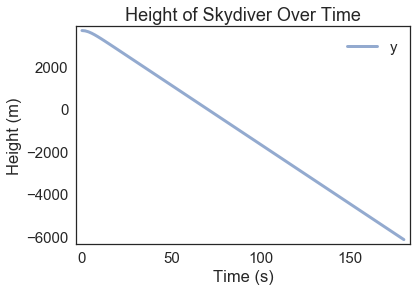

In [19]:
#this figure cits off axis when saved
plot_position(system_human.results)
savefig('skydiving_run_nopara.pdf')

In [23]:
#t_end = flight_time(system_human)
condition.set(start = 1000*m)
condition.set(end = 0*m)
system_human = make_system(condition)
run_odeint(system_human, slope_func_update)
condition.set(duration = flight_time(system_human)*s)
system_human = make_system(condition)
run_odeint(system_human, slope_func_update)

In [24]:
type(system_human.results)

modsim.TimeFrame

Saving figure to file skydiving_run.pdf


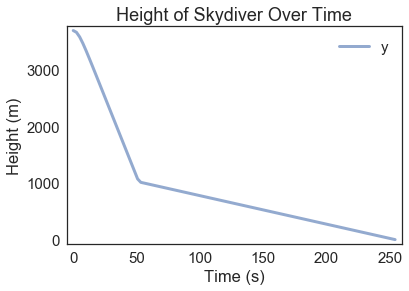

In [26]:
#This is the figure that cut off the axis
import seaborn
plot_position(system_human.results)
savefig('skydiving_run.pdf')

In [27]:
T = interp_inverse(system_human.results.y, kind='cubic')

In [28]:
#make time stop when position is 0
#make function to output the end velocity, or force, or acceleration
#optimize end velocity with out dying
    #sweep parachute times

In [29]:
def interpolate_range(results):
    """Computes the range of the ball when it lands.
    
    results: TimeFrame with x and y
    
    returns: distance in meters
    """
    ys = results.y
    t_end = ys.index[-1]
    
    if ys[t_end] > 0:
        msg = """The final value of y is still positive;
                 looks like the simulation didn't run
                 long enough."""
        raise ValueError(msg)
        
    t_peak = ys.argmax()
    descent = ys.loc[t_peak:]
    T = interp_inverse(descent, kind='cubic')
    
    return T(0)

In [30]:
interpolate_range(system_human.results)

array(254.2393495275928)

In [31]:
def find_force(system, results):
    unpack(system)
    v_end = final_velocity(system, results)
    t = 1*s
    force = (mass*(v_end-0*m/s))/t
    return force

In [32]:
find_force(system_human, system_human.results)

<Quantity(-378.4920567280601, 'kilogram * meter / second ** 2')>

In [33]:
t = linrange (0, 60, 2)
print (t)

[  0.   2.   4.   6.   8.  10.  12.  14.  16.  18.  20.  22.  24.  26.  28.
  30.  32.  34.  36.  38.  40.  42.  44.  46.  48.  50.  52.  54.  56.  58.
  60.]


In [34]:
def param_sweep ():
    sweep = SweepSeries()
    pullchute_array = linrange(382.75, 382.9, 0.001)
    for pull in pullchute_array:
        condition.set(duration = flight_time(system_human)*s)
        condition.set(start = pull*m)
        condition.set(end = 0*m)
        system = make_system(condition)
        run_odeint(system, slope_func_update)
        v_end = final_velocity(system, system.results)
        sweep[pull] = v_end.magnitude
    pullchute_array_2 = linrange(0, 500, 50)
    """for pull2 in pullchute_array_2:
        condition.set(duration = flight_time(system_human)*s)
        condition.set(start = pull2*m)
        condition.set(end = 0*m)
        system = make_system(condition)
        run_odeint(system, slope_func_update)
        v_end = final_velocity(system, system.results)
        sweep[pull2] = v_end.magnitude"""
    return sweep

In [ ]:
sweep = param_sweep()

In [ ]:
print(sweep)

In [ ]:
plot(sweep)

In [ ]:
plot(sweep)

In [ ]:
plot(sweep)

In [ ]:
plot(sweep)